In [0]:
#Import libraries
import numpy as np
np.random.seed(42)
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical, np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [0]:
#Mount to google drive for easy access to files for import/export
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
xTrainGender = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsGender/xTrainGender.npy')
xTestGender = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsGender/xTestGender.npy')
yTrainGender = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsGender/yTrainGender.npy')
yTestGender = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsGender/yTestGender.npy')

In [0]:
checkpointPath1 = '/content/gdrive/My Drive/Google_Collab/CNNModelsGender/cnnModelGender1.h5'

keras_callbacks1   = [
      EarlyStopping(monitor='val_loss', patience=20, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpointPath1, monitor='val_loss', save_best_only=True, mode='min')
]

In [0]:
#Class weights computed from data prep and EDA
classWeightsGender = {0: 0.620,
                      1: 0.380}

In [0]:
cnnModelGender = Sequential()
cnnModelGender.add(Conv2D(filters=8, kernel_size=3, activation='relu', input_shape=(150,150,1))) 
cnnModelGender.add(BatchNormalization())
cnnModelGender.add(MaxPooling2D(pool_size=(2,2)))
cnnModelGender.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnnModelGender.add(BatchNormalization())
cnnModelGender.add(MaxPooling2D(pool_size=(2,2)))
cnnModelGender.add(Flatten())
cnnModelGender.add(Dense(128, activation='relu'))
cnnModelGender.add(Dropout(0.5))
cnnModelGender.add(Dense(1, activation='sigmoid'))
cnnModelGender.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
historyGender = cnnModelGender.fit(xTrainGender, yTrainGender, 
                                   validation_data=(xTestGender, yTestGender),
                                   batch_size=16,
                                   class_weight=classWeightsGender,
                                   callbacks=keras_callbacks1, 
                                   epochs=100,
                                   verbose=2)

Train on 2808 samples, validate on 1204 samples
Epoch 1/100
 - 30s - loss: 0.6638 - acc: 0.8095 - val_loss: 0.3389 - val_acc: 0.9161
Epoch 2/100
 - 29s - loss: 0.1716 - acc: 0.9184 - val_loss: 0.3141 - val_acc: 0.9178
Epoch 3/100
 - 29s - loss: 0.0847 - acc: 0.9448 - val_loss: 0.1431 - val_acc: 0.9535
Epoch 4/100
 - 29s - loss: 0.0550 - acc: 0.9580 - val_loss: 0.1942 - val_acc: 0.9527
Epoch 5/100
 - 29s - loss: 0.0418 - acc: 0.9683 - val_loss: 0.1159 - val_acc: 0.9684
Epoch 6/100
 - 29s - loss: 0.0282 - acc: 0.9786 - val_loss: 0.1635 - val_acc: 0.9502
Epoch 7/100
 - 29s - loss: 0.0297 - acc: 0.9833 - val_loss: 0.1850 - val_acc: 0.9610
Epoch 8/100
 - 29s - loss: 0.0379 - acc: 0.9747 - val_loss: 0.1513 - val_acc: 0.9601
Epoch 9/100
 - 29s - loss: 0.0231 - acc: 0.9833 - val_loss: 0.1225 - val_acc: 0.9668
Epoch 10/100
 - 29s - loss: 0.0293 - acc: 0.9833 - val_loss: 0.2265 - val_acc: 0.9510
Epoch 11/100
 - 29s - loss: 0.0211 - acc: 0.9815 - val_loss: 0.1819 - val_acc: 0.9601
Epoch 12/100
 -

In [0]:
train_scores_cnn = cnnModelGender.evaluate(xTrainGender, yTrainGender, verbose=2)
print('Train loss:', train_scores_cnn[0])
print('Train accuracy:', train_scores_cnn[1])
test_scores_cnn = cnnModelGender.evaluate(xTestGender, yTestGender, verbose=2)
print('Test loss:', test_scores_cnn[0])
print('Test accuracy:', test_scores_cnn[1])

Train loss: 0.021124311328042513
Train accuracy: 0.9921652419954283
Test loss: 0.39154878380148367
Test accuracy: 0.936046511825929


In [0]:
modelTest1 = load_model(checkpointPath1)
train1 = modelTest1.evaluate(xTrainGender, yTrainGender, verbose=2)
print('Train loss:', train1[0])
print('Train accuracy:', train1[1])
test1 = modelTest1.evaluate(xTestGender, yTestGender, verbose=2)
print('Test loss:', test1[0])
print('Test accuracy:', test1[1])

Train loss: 0.01884487562579371
Train accuracy: 0.9939458689458689
Test loss: 0.11590494257568125
Test accuracy: 0.96843853820598


In [0]:
cnnModelGender.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 8)       80        
_________________________________________________________________
batch_normalization_3 (Batch (None, 148, 148, 8)       32        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 16)        1168      
_________________________________________________________________
batch_normalization_4 (Batch (None, 72, 72, 16)        64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 20736)            

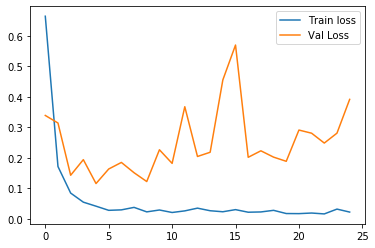

In [0]:
plt.plot(historyGender.history['loss'], label='Train loss')
plt.plot(historyGender.history['val_loss'], label='Val Loss')
plt.legend();

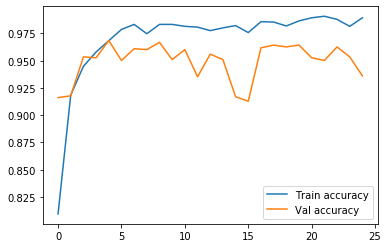

In [0]:
plt.plot(historyGender.history['acc'], label='Train accuracy')
plt.plot(historyGender.history['val_acc'], label='Val accuracy')
plt.legend();